In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([784, 392]), name='weight1')
    b1 = tf.Variable(tf.random_normal([392]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([392, 196]), name='weight2')
    b2 = tf.Variable(tf.random_normal([196]), name='bias2')
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

with tf.name_scope("layer3") as scope:
    W3 = tf.Variable(tf.random_normal([196, 84]), name='weight3')
    b3 = tf.Variable(tf.random_normal([84]), name='bias3')
    layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    
with tf.name_scope("layer4") as scope:
    W4 = tf.Variable(tf.random_normal([84, nb_classes]), name='weight4')
    b4 = tf.Variable(tf.random_normal([nb_classes]), name='bias4')
    hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

In [20]:
# cost/loss function
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

learning_rate = 0.01
with tf.name_scope("train") as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [21]:
# parameters
training_epochs = 15
batch_size = 100

In [22]:
import random
import matplotlib.pyplot as plt

Epoch: 0001 cost = 0.098441205
Epoch: 0002 cost = 0.040552027
Epoch: 0003 cost = 0.033466795
Epoch: 0004 cost = 0.028807404
Epoch: 0005 cost = 0.026588075
Epoch: 0006 cost = 0.025540498
Epoch: 0007 cost = 0.023661322
Epoch: 0008 cost = 0.023341322
Epoch: 0009 cost = 0.022135628
Epoch: 0010 cost = 0.020600009
Epoch: 0011 cost = 0.019214984
Epoch: 0012 cost = 0.018477074
Epoch: 0013 cost = 0.017780782
Epoch: 0014 cost = 0.017857609
Epoch: 0015 cost = 0.016688026

Hypothesis:  [[  4.76749392e-06   3.63797371e-05   1.17706705e-03 ...,   9.99574602e-01
    4.82384303e-06   3.97034601e-04]
 [  1.25577732e-04   1.18824559e-04   9.94943202e-01 ...,   2.20682114e-06
    8.26840813e-04   1.46098555e-05]
 [  1.74433194e-06   9.99778569e-01   5.28700330e-05 ...,   3.03132492e-05
    3.66152635e-05   1.30511311e-04]
 ..., 
 [  7.02033503e-06   9.97476236e-05   1.16107301e-04 ...,   3.99150413e-05
    6.16818725e-04   8.11144535e-04]
 [  7.11352404e-05   1.04277242e-05   1.13988070e-04 ...,   1.4944

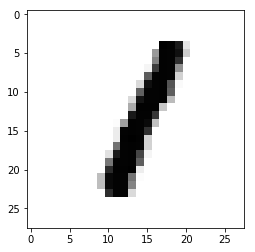

In [23]:
# Launch graph
with tf.Session() as sess:
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./MNIST_logs/loss_r0_01")
    writer.add_graph(sess.graph)  # Show the graph
    
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, summary, _ = sess.run([cost, merged_summary, train], feed_dict={
                            X: batch_xs, Y: batch_ys})
            writer.add_summary(summary, global_step=step)
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: mnist.test.images, Y: mnist.test.labels})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()